<a href="https://colab.research.google.com/github/SumaiyahAnwar/CodSoft/blob/main/CAR_SALES_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/drive/MyDrive/car_purchasing.csv", encoding='ISO-8859-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
print(f"Dataset have {df.shape[0]} columns and {df.shape[1]} rows" )

Dataset have 500 columns and 9 rows


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [6]:
check_data = pd.DataFrame({
    'Unique':df.nunique(),
    'Null':df.isnull().sum(),
    'NullPercent':df.isnull().sum() / len(df),
    'Duplicated':df.isna().sum(),
    'Type':df.dtypes.values
})
check_data

,Unique,Null,NullPercent,Duplicated,Type
customer name,498,0,0.0,0,object
customer e-mail,500,0,0.0,0,object
country,211,0,0.0,0,object
gender,2,0,0.0,0,int64
age,500,0,0.0,0,float64
annual Salary,500,0,0.0,0,float64
credit card debt,500,0,0.0,0,float64
net worth,500,0,0.0,0,float64
car purchase amount,500,0,0.0,0,float64


In [7]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [8]:
# @title VISUALIZATION

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
num = df.select_dtypes(exclude='O')
num.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


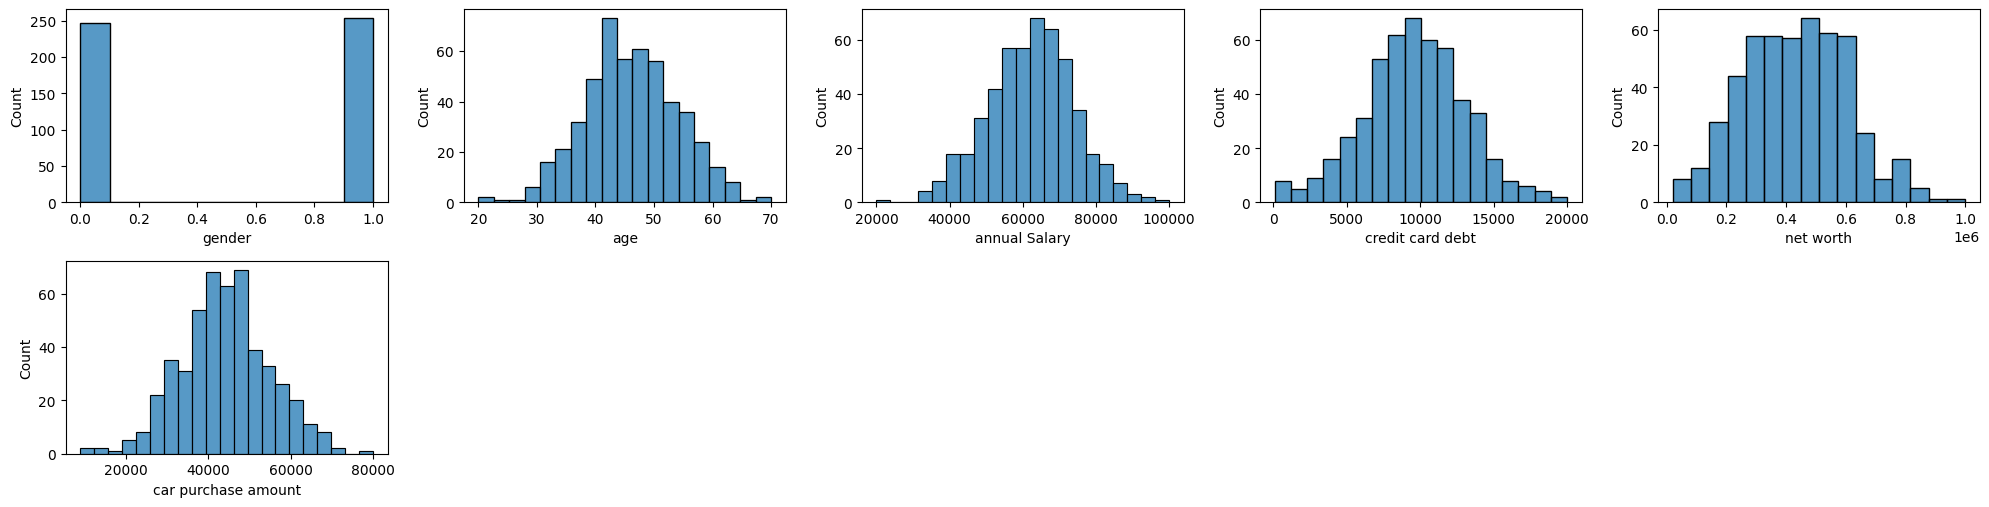

In [11]:
plt.figure(figsize=(20,50))
for i, col in enumerate(num.columns):
  axes = plt.subplot(20,5,i+1)
  sns.histplot(x=num[col])
plt.tight_layout()
plt.show()

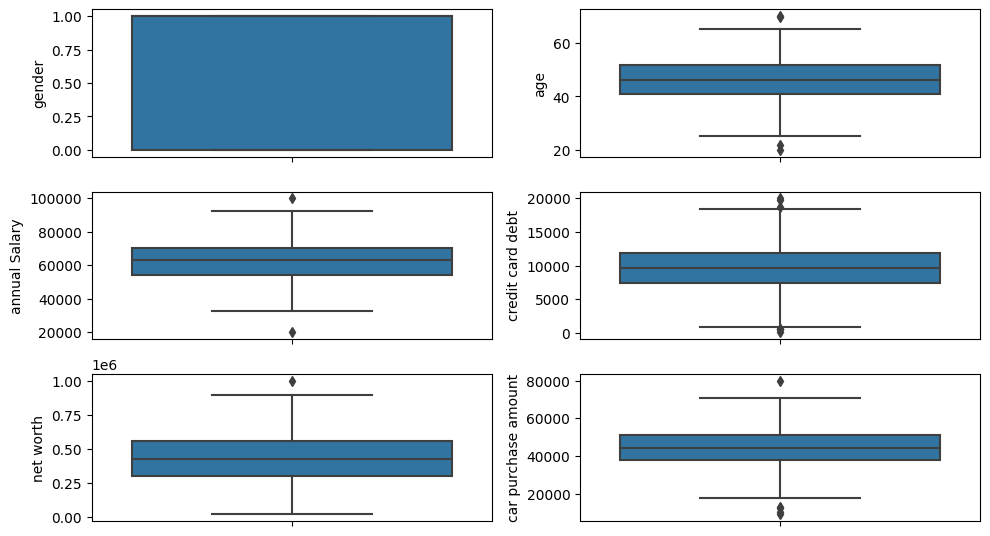

In [14]:
#BOX PLOT
plt.figure(figsize=(10,20))
for i, col in enumerate(num.columns):
  axes = plt.subplot(11,2, i + 1)
  sns.boxplot(y=num[col])
plt.tight_layout()
plt.show()

In [15]:
df.corr()

<ipython-input-15-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,gender,age,annual Salary,credit card debt,net worth,car purchase amount
gender,1.000000,-0.064481,-0.036499,0.024193,-0.008395,-0.066408
age,-0.064481,1.000000,0.000130,0.034721,0.020356,0.632865
annual Salary,-0.036499,0.000130,1.000000,0.049599,0.014767,0.617862
credit card debt,0.024193,0.034721,0.049599,1.000000,-0.049378,0.028882
net worth,-0.008395,0.020356,0.014767,-0.049378,1.000000,0.488580
car purchase amount,-0.066408,0.632865,0.617862,0.028882,0.488580,1.000000


In [16]:
df[['age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']].corr()

,age,annual Salary,credit card debt,net worth,car purchase amount
age,1.000000,0.000130,0.034721,0.020356,0.632865
annual Salary,0.000130,1.000000,0.049599,0.014767,0.617862
credit card debt,0.034721,0.049599,1.000000,-0.049378,0.028882
net worth,0.020356,0.014767,-0.049378,1.000000,0.488580
car purchase amount,0.632865,0.617862,0.028882,0.488580,1.000000


(0.0, 83550.0)

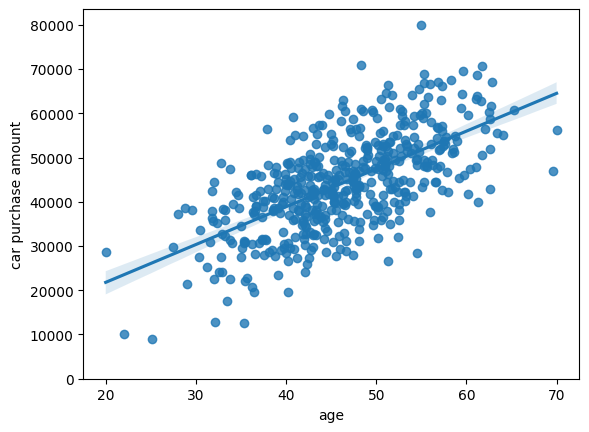

In [17]:
sns.regplot(x='age', y='car purchase amount', data=df)
plt.ylim(0,)

(0.0, 83550.0)

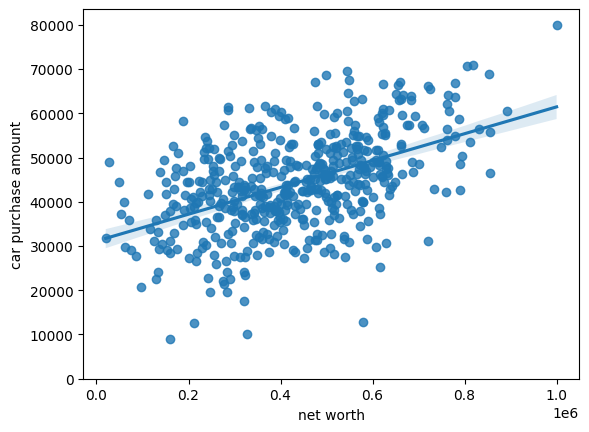

In [18]:
sns.regplot(x="net worth", y="car purchase amount", data=df)
plt.ylim(0,)

In [19]:
# @title MODELLING

In [20]:
y = df['car purchase amount']
x = df.drop(['customer name', 'customer e-mail', 'country'], axis=1)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(x,y,test_size=0.25,shuffle = True,random_state=0)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

#METRICS
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [23]:
def performance(model,X_train,y_train,y_pred,y_test):
  print('Train Score:',model.score(X_train,y_train))
  print('Test Score:',r2_score(y_test,y_pred))
  print('')
  print('MSE:',mean_squared_error(y_test,y_pred))
  print('MAE:',mean_absolute_error(y_test,y_pred))

In [24]:
#FITTING THE MODEL
lr = LinearRegression()
lr.fit(X_train,y_train)

#PREDICTED DATA
lr_pred = lr.predict(X_test)
performance(lr,X_train,y_train,lr_pred,y_test)

Train Score: 1.0
Test Score: 1.0

MSE: 2.389956400237212e-22
MAE: 1.261651050299406e-11


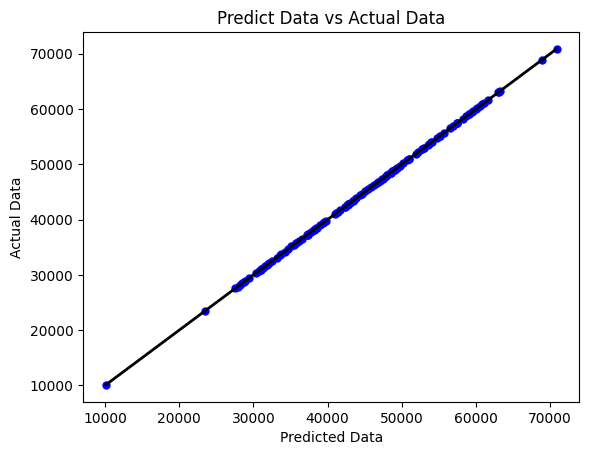

In [25]:
plt.scatter(lr_pred,y_test,c='blue',marker='o',s=25)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],c='black',lw=2)
plt.xlabel('Predicted Data')
plt.ylabel('Actual Data')
plt.title('Predict Data vs Actual Data')
plt.show()

In [26]:
#FITTING THE MODEL
ridge = Ridge(alpha=1)
ridge.fit(X_train,y_train)

#PREDICTED DATA
ridge_pred = ridge.predict(X_test)
performance(ridge,X_train,y_train,ridge_pred,y_test)

Train Score: 1.0
Test Score: 1.0

MSE: 4.738755501231361e-12
MAE: 1.6833656845847146e-06


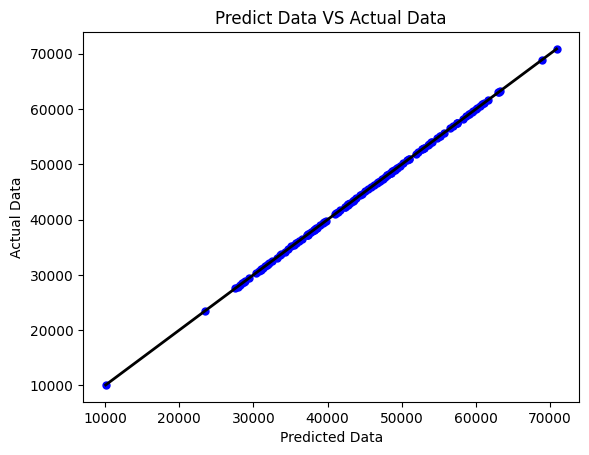

In [27]:
plt.scatter(ridge_pred,y_test,c='blue',marker='o',s=25)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],c='black',lw=2)
plt.xlabel('Predicted Data')
plt.ylabel('Actual Data')
plt.title('Predict Data VS Actual Data')
plt.show()